In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Functions, Histograms, and Groups

**Reading**: 

* [Visualizing Numerical Distributions](https://inferentialthinking.com/chapters/07/2/Visualizing_Numerical_Distributions.html) 
* [Functions and Tables](https://inferentialthinking.com/chapters/08/Functions_and_Tables.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.


**Throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not reassign it later on. Moreover, please be sure to only put your written answers in the provided cells. 

In [2]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


## Burrito-ful San Diego

Tam, Margaret and Winifred are trying to use Data Science to find the best burritos in San Diego! Their friends Irene and Maya provided them with two comprehensive datasets on many burrito establishments in the San Diego area taken from (and cleaned from): https://www.kaggle.com/srcole/burritos-in-san-diego/data

The following cell reads in a table called `ratings` which contains names of burrito restaurants, their Yelp rating, Google rating, as well as their Overall rating. It also reads in a table called `burritos_types` which contains names of burrito restaurants, their menu items, and the cost of the respective menu item at the restaurant.

In [3]:
#Just run this cell
ratings = Table.read_table("ratings.csv")
ratings.show(5)
burritos_types = Table.read_table("burritos_types.csv")
burritos_types.show(5)

Name,Yelp,Google,Overall
Albertacos,3.5,3.9,3.45
Burrito Factory,4.5,4.8,3.5
Burros and Fries,3.5,4.1,3.575
Caliente Mexican Food,3.5,4.4,3.25
California Burrito Company,3.5,4.4,3.2


Name,Menu_Item,Cost
Albertacos,California,5.7
Albertacos,Carne asada,5.25
"Alberto's 623 N Escondido Blvd, Escondido, CA 92025",Carne Asada,4.59
Burrito Box,Steak with guacamole,11.5
Burrito Factory,Steak everything,7.35


**Question 1.** It would be easier if we could combine the information in both tables. Assign `burritos` to the result of joining the two tables together.

*Note: it doesn't matter which table you put in as the argument to the table method, either order will work for the autograder tests.*

*Hint: If you need refreshers on table methods, look at the [python reference](http://data8.org/sp20/python-reference.html).*

<!--
BEGIN QUESTION
name: q1_1
-->

In [4]:
burritos = ratings.join("Name", burritos_types)
burritos.show(5)

Name,Yelp,Google,Overall,Menu_Item,Cost
Albertacos,3.5,3.9,3.45,California,5.7
Albertacos,3.5,3.9,3.45,Carne asada,5.25
Burrito Factory,4.5,4.8,3.5,Steak everything,7.35
Burros and Fries,3.5,4.1,3.575,California,7.19
Burros and Fries,3.5,4.1,3.575,Carne asada,6.89


In [ ]:
grader.check("q1_1")

<!-- BEGIN QUESTION -->

**Question 2.** Let's look at how the Yelp scores compare to the Google scores in the `burritos` table. First, assign `yelp_and_google` to a table only containing the columns `Yelp` and `Google`. Then, make a scatter plot with Yelp scores on the x-axis and the Google scores on the y-axis. 

<!--
BEGIN QUESTION
name: q1_2
manual: True
-->

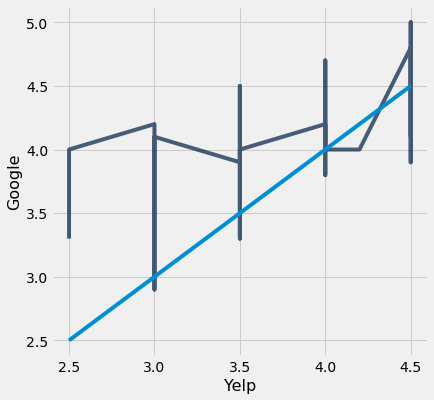

In [9]:
yelp_and_google = burritos.select("Yelp", "Google")
yelp_and_google.plot("Yelp", "Google")
# Don't change/edit/remove the following line.
# To help you make conclusions, we have plotted a straight line on the graph (y=x)
plt.plot(np.arange(2.5,5,.5), np.arange(2.5,5,.5));

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 3.** Looking at the scatter plot you just made in Question 1.2, do you notice any pattern(s) (i.e. is one of the two types of scores consistently higher than the other one)? If so, describe them **briefly** in the cell below.

<!--
BEGIN QUESTION
name: q1_3
manual: True
-->

The Google scores seem mostly higher than the Yelp ones, but this is hard to tell because Yelp only shows scores in increments of 0.5 while Google shows them in increments of .1

<!-- END QUESTION -->



Here's a refresher on how `.group` works! You can read how `.group` works in the [textbook](https://www.inferentialthinking.com/chapters/08/2/Classifying_by_One_Variable.html), or you can view the video below.

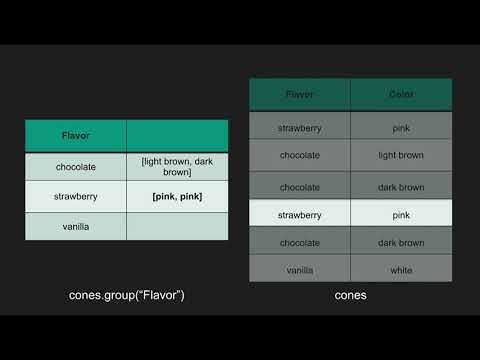

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo("HLoYTCUP0fc")

**Question 4.** From the `burritos` table, some of the restaurant locations have multiple reviews. Winifred thinks California burritos are the best type of burritos, and wants to see the average overall rating for California burritos at each location. Create a table that has two columns: the name of the restaurant and the average overall rating of California burritos at each location.

*Hint: In the burritos table, California burritos are represented as California*

*Note: you can break up the solution into multiple lines, as long as you assign the final output table to `california_burritos`!*

<!--
BEGIN QUESTION
name: q1_4
-->

In [20]:
correct_table = burritos.select("Name", "Menu_Item", "Overall")
california_burritos = correct_table.where("Menu_Item", are.equal_to("California")).drop("Menu_Item")
california_burritos

Name,Overall
Burros and Fries,3.575
Caliente Mexican Food,3.25
California Burrito Company,3.2
Cancun Mexican & Seafood,4.1
Cotixan,3.6
Cotixan,3.6
Don Carlos Taco Shop,3.3
El Dorado Mexican Food,4.025
El Dorado Mexican Food,4.025
El Indio,4


In [18]:
grader.check("q1_4")

NameError: name 'grader' is not defined

**Question 5.** Given this new table `california_burritos`, Winifred can figure out the name of the restaurant with the highest overall average rating! write code to assign `best_restaurant` to a string that corresponds to the name of the restaurant with the highest overall average rating. 

*Hint: Otter Grader is bit picky in expecting a string. In order to output a string from an array, you will need to use item(i), where i is the index


<!--
BEGIN QUESTION
name: q1_5
-->

In [26]:
best_restaurant = california_burritos.sort("Overall", descending=True).take[0]
best_restaurant

Name,Overall
Mikes Taco Club,4.4


In [ ]:
grader.check("q1_5")

<!-- BEGIN QUESTION -->

**Question 6.** Tam is interested in finidng out the distribution of the price of burritos. Plot a histogram that visualizes that distribution of the costs of the burritos in the `burritos` table. Also use the provided `bins` variable when making your histogram, so that visually the histogram is more informative.

<!--
BEGIN QUESTION
name: q1_7
manual: True
-->

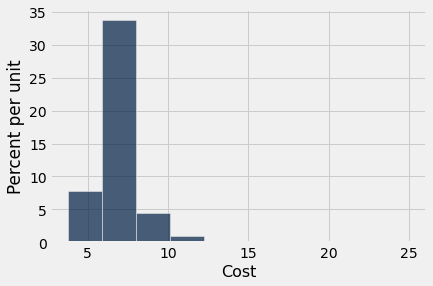

In [27]:
the_bins = np.arange(0, 15, 1)
burritos.hist("Cost")

<!-- END QUESTION -->



## 2. Faculty salaries


This exercise is designed to give you practice using the Table methods `pivot` and `group`. [Here](http://data8.org/sp20/python-reference.html) is a link to the Python reference page in case you need a quick refresher.

Run the cell below to view a demo on how you can use pivot on a table.

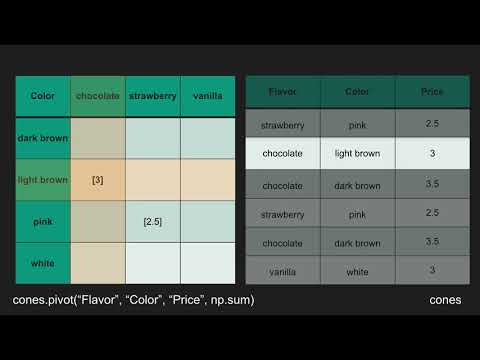

In [28]:
from IPython.display import YouTubeVideo
YouTubeVideo("4WzXo8eKLAg")

In the next cell, we load a dataset which contains faculty, their departments, their positions, and their gross salaries in a university.

In [3]:
raw_profs = Table.read_table("faculty.csv").where("year", are.equal_to(2015)).drop("year", "title")
profs = raw_profs.relabeled("title_category", "position")
profs

name,department,position,gross_salary
CYNTHIA ABAN,South & Southeast Asian Studies,lecturer,64450
PIETER ABBEEL,Computer Science,associate professor,184998
SALLY ABEL,Law,lecturer,3466
ELIZABETH ABEL,English,professor,138775
DOR ABRAHAMSON,Education,associate professor,100300
KATHRYN ABRAMS,Law,professor,319693
BARBARA ABRAMS,Public Health,professor,191162
SARAH ACCOMAZZO,Social Welfare,lecturer,14779
CHARISMA ACEY,City and Regional Planning,assistant professor,101567
DAVID ACKERLY,Biology,professor,182288


We want to use this table to generate arrays with the names of each professor in each department.

**Question 1.** Set `prof_names` to a table with two columns. The first column should be called `department` and have the name of every department once, and the second column should be called `faculty` with each row in that second column containing an *array* of the names of all faculty members in that department. 

*Hint:* Think about how ```group``` works: it collects values into an array and then applies a function to that array. We have defined two functions below for you, and you will need to use one of them in your call to ```group```.

<!--
BEGIN QUESTION
name: q2_1
-->

In [4]:
# Pick one of the two functions defined below in your call to group.
def identity(array):
    '''Returns the array that is passed through'''
    return array 

def first(array):
    '''Returns the first item'''
    return array.item(0)

# Make a call to group using one of the functions above when you define prof_names
prof_names = profs.select("department", "name").relabel("name", "faculty").group("department", collect=identity)
prof_names

department,faculty identity
African American Studies,['AYA DE LEON' 'CHIYUMA ELLIOTT' 'NIKKI JONES' 'DAVID KY ...
Agricultural and Resource Economics and Policy,['MAXIMILIAN AUFFHAMMER' 'CHARLES GIBBONS' 'JEFFREY PERL ...
Anthroplogy,['SABRINA AGARWAL' 'STANLEY BRANDES' 'CHARLES BRIGGS' ' ...
Architecture,['MARK ANDERSON' 'JACOB ATHERTON' 'WILLIAM ATWOOD' 'R.GA ...
Art History,['DILIANA ANGELOVA' 'PATRICIA BERGER' 'JULIA BRYAN-WILSO ...
Art Practice,['ALLAN DESOUZA' 'AIDA GAMEZ' 'RANDY HUSSONG' 'JENNIFER ...
Astronomy,['GIBOR BASRI' 'STEVEN BECKWITH' 'LEO BLITZ' 'EUGENE CHI ...
Bioengineering,['ADAM ARKIN' 'IRINA CONBOY' 'STEVEN CONOLLY' 'JOHN DUEB ...
Biology,['DAVID ACKERLY' 'HILLEL ADESNIK' 'KELLY AGNEW' 'DORIS B ...
Buddhist Studies,['JANN RONIS']


In [ ]:
grader.check("q2_1")

#### Understanding the code you just wrote in 2.1 is important for moving forward with the class! If you made a lucky guess, take some time to look at the code, step by step.

<!-- BEGIN QUESTION -->

**Question 2 (this is a bonus question).** At the moment, the ```name``` column of the `profs` table is sorted by last name. Would the arrays you generated in the `faculty` column of the previous part be the same if we had sorted by first name instead before generating them? Two arrays are the **same** if they contain the same number of elements and the elements located at corresponding indexes in the two arrays are identical. An example of arrays that are NOT the same: `array([1,2]) != array([2,1])`. Explain your answer.  


<!--
BEGIN QUESTION
name: q2_2
manual: true
-->

_Type your answer here, replacing this text._

<!-- END QUESTION -->

**Question 3.** Set `department_ranges` to a table containing departments as the rows, and the position as the columns. The values in the rows should correspond to a salary range, where range is defined as the **difference between the highest salary and the lowest salary in the department for that position**. 

*Hint:* First you'll need to define a new function `salary_range` which takes in an array of salaries and returns the range of salaries in that array. 

<!--
BEGIN QUESTION
name: q2_3
manual: false
-->

In [ ]:
# Define salary_range first (refer to qusetion 1 on defining a question)
def salary_range(array):
    '''Returns the array that is passed through'''
    return np.max(array)-np.min(array)

department_ranges = ...
department_ranges

In [ ]:
grader.check("q2_3")

<!-- BEGIN QUESTION -->

**Question 4.** Give an explanation as to why some of the row values are `0` in the `department_ranges` table from the previous question.

<!--
BEGIN QUESTION
name: q2_3
manual: True
-->

_Type your answer here, replacing this text._

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Data Science Education Survey
DATA SCIENCE EDUCATION SURVEY: You are invited to complete a survey about your experiences in data science courses and other programs on campus. Your responses to this survey will be used to understand the strengths and weaknesses of current campus offerings. It will also be used to improve data science education at other campuses around the country. Participation is OPTIONAL. Your participation in the study will not affect your grades. None of your instructors will see your individual responses or whether you participated. The survey should take about 10 minutes. Please complete the survey here: https://berkeley.qualtrics.com/jfe/form/SV_0eJFaM0VcnRDWHs 

### Did you finish the survey? type yes or no

In [ ]:
answer = ...

## Undergraduate Experiences at UMBC
The purpose of this study is to understand the experiences of undergraduate students at UMBC. You are being asked to participate in this study because your professor has agreed to help in this exploration. Please complete the survey at
https://docs.google.com/forms/d/e/1FAIpQLSc4ODsXp7Xj9diakosM7fhG-3pSrvVOh3aUIeJT00fl5GclnA/viewform?usp=sf_link

### Did you finish the survey? type yes or no


In [ ]:
answer = ...

## Submission

Make sure you have run all cells in your notebook so that all images/graphs appear in the output.  **Please save before exporting!**,please download as a pdf as submission.